## Make list of models for evaluation
1. Read in historical model runs for ts and precip
2. Read in future model runs for RCP8.5 ts and precip
3. Make list of all models eligible for evaluation

In [1]:
#Imports
import xarray as xr
import sys
sys.path.append('/home/563/rl5183/Functions')
import model_functions as func
import os
import pandas as pd
import numpy as np
import scipy
from scipy import signal
from importlib import reload
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
func = reload(func)

In [3]:
#Historical model runs
hist_temp = func.read_hist_models('/g/data/lp01/CMIP6/CMIP/', '/historical/r1i1p1f1/Amon/ts/gr1.5/')
hist_precip = func.read_hist_models('/g/data/lp01/CMIP6/CMIP/', '/historical/r1i1p1f1/Amon/pr/gr1.5/')

GISS-E2-2-G path does not exist
MIROC-ES2L path does not exist
FIO-ESM-2-0 path does not exist
HadGEM3-GC31-MM path does not exist
HadGEM3-GC31-LL path does not exist
UKESM1-0-LL path does not exist
CNRM-ESM2-1 path does not exist
CNRM-CM6-1 path does not exist
EC-Earth3-LR path does not exist
NorESM1-F path does not exist
IITM-ESM path does not exist
44 model paths found and stored in models dictionary
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/ts/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/ts/gr1.5/v20190630/*.nc
MCM-UA-1-0 /g/data/lp01/CMIP6/CMIP/UA/MCM-UA-1-0/historical/r1i1p1f1/Amon/ts/gr1.5/v20190731/*.nc
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/ts/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/ts/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historic

In [4]:
hist_temp

,Array,Chunk
Bytes,9.12 GB,228.10 MB
Shape,"(40, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,160 Tasks,40 Chunks
Type,float32,numpy.ndarray


In [5]:
hist_precip

,Array,Chunk
Bytes,9.35 GB,228.10 MB
Shape,"(41, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,164 Tasks,41 Chunks
Type,float32,numpy.ndarray


In [6]:
#Future model runs
future_temp = func.read_future_models('/g/data/lp01/CMIP6/ScenarioMIP/', '/ssp585/r1i1p1f1/Amon/ts/gr1.5/')
future_precip = func.read_future_models('/g/data/lp01/CMIP6/ScenarioMIP/', '/ssp585/r1i1p1f1/Amon/pr/gr1.5/')

MPI-ESM-1-2-HAM path does not exist
MCM-UA-1-0 path does not exist
MIROC-ES2L path does not exist
FIO-ESM-2-0 path does not exist
UKESM1-0-LL path does not exist
CNRM-ESM2-1 path does not exist
CNRM-CM6-1 path does not exist
27 model paths found and stored in models dictionary
NESM3 /g/data/lp01/CMIP6/ScenarioMIP/NUIST/NESM3/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190728/*.nc
ACCESS-CM2 /g/data/lp01/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190924/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-LR/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190119/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/ScenarioMIP/CAS/FGOALS-f3-L/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20191013/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190818/*.nc
BCC-CSM2-MR /g/data/lp01/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp585/r1i1p1f1/Amon/ts/gr1.5/v201903

In [7]:
future_precip

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 240, model: 24, time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2100-12-31
  * lat      (lat) float64 -89.25 -87.75 -86.25 -84.75 ... 86.25 87.75 89.25
  * lon      (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * model    (model) <U13 'NESM3' 'ACCESS-CM2' ... 'CESM2' 'CESM2-WACCM'
Data variables:
    pr       (model, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 120, 240), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 1.9.5 (http://m...
    history:                   Mon Oct 21 23:25:26 2019: cdo -O -P 28 -remapc...
    source:                    NESM v3 (2016): \naerosol: none\natmos: ECHAM ...
    institution:               Nanjing University of Information Science and ...
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             standard
    branch_time_in_child:      0.0
    branch_time_in_parent:     2015.0
    contact:                   esmc@nuist.edu.cn
    creation_date:             2019-07-28T10:11:24Z
    data_specs_version:        01.00.30
    experiment:                update of RCP8.5 based on SSP5
    experiment_id:             ssp585
    external_variables:        areacella
    forcing_index:             1
    frequency:                 mon
    further_info_url:          https://furtherinfo.es-doc.org/CMIP6.NUIST.NES...
    grid:                      T63
    grid_label:                gn
    initialization_index:      1
    institution_id:            NUIST
    mip_era:                   CMIP6
    nominal_resolution:        250 km
    parent_activity_id:        CMIP
    parent_experiment_id:      historical
    parent_mip_era:            CMIP6
    parent_source_id:          NESM3
    parent_time_units:         days since 1850-01-01 00:00:00
    parent_variant_label:      r1i1p1f1
    physics_index:             1
    product:                   model-output
    realization_index:         1
    realm:                     atmos
    references:                Model described by Cao et al. 2018 GMD   Also ...
    source_id:                 NESM3
    source_type:               AOGCM
    sub_experiment:            none
    sub_experiment_id:         none
    table_id:                  Amon
    table_info:                Creation Date:(30 April 2019) MD5:cc2ae51c2396...
    title:                     NESM3 output prepared for CMIP6
    tracking_id:               hdl:21.14100/be61b286-f64b-4c8e-a1da-c30ccb0cef61
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by Lawrence Livermor...
    cmor_version:              3.4.0
    CDO:                       Climate Data Operators version 1.9.5 (http://m...
    cdo_openmp_thread_number:  28

In [8]:
future_temp

<xarray.Dataset>
Dimensions:  (lat: 120, lon: 240, model: 24, time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2100-12-31
  * lat      (lat) float64 -89.25 -87.75 -86.25 -84.75 ... 86.25 87.75 89.25
  * lon      (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * model    (model) <U13 'NESM3' 'ACCESS-CM2' ... 'CESM2' 'CESM2-WACCM'
Data variables:
    ts       (model, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 120, 240), meta=np.ndarray>
Attributes:
    CDI:                       Climate Data Interface version 1.9.5 (http://m...
    history:                   Mon Oct 21 22:58:02 2019: cdo -O -P 28 -remapc...
    source:                    NESM v3 (2016): \naerosol: none\natmos: ECHAM ...
    institution:               Nanjing University of Information Science and ...
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             standard
    branch_time_in_child:      0.0
    branch_time_in_parent:     2015.0
    contact:                   esmc@nuist.edu.cn
    creation_date:             2019-07-28T10:03:39Z
    data_specs_version:        01.00.30
    experiment:                update of RCP8.5 based on SSP5
    experiment_id:             ssp585
    external_variables:        areacella
    forcing_index:             1
    frequency:                 mon
    further_info_url:          https://furtherinfo.es-doc.org/CMIP6.NUIST.NES...
    grid:                      T63
    grid_label:                gn
    initialization_index:      1
    institution_id:            NUIST
    mip_era:                   CMIP6
    nominal_resolution:        250 km
    parent_activity_id:        CMIP
    parent_experiment_id:      historical
    parent_mip_era:            CMIP6
    parent_source_id:          NESM3
    parent_time_units:         days since 1850-01-01 00:00:00
    parent_variant_label:      r1i1p1f1
    physics_index:             1
    product:                   model-output
    realization_index:         1
    realm:                     atmos
    references:                Model described by Cao et al. 2018 GMD   Also ...
    source_id:                 NESM3
    source_type:               AOGCM
    sub_experiment:            none
    sub_experiment_id:         none
    table_id:                  Amon
    table_info:                Creation Date:(30 April 2019) MD5:cc2ae51c2396...
    title:                     NESM3 output prepared for CMIP6
    tracking_id:               hdl:21.14100/22173932-7659-4d0e-a7ac-68e09997b6c3
    variable_id:               ts
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by Lawrence Livermor...
    cmor_version:              3.4.0
    CDO:                       Climate Data Operators version 1.9.5 (http://m...
    cdo_openmp_thread_number:  28

In [9]:
#Find common models between all four datasets
hist_temp = hist_temp.where(hist_temp.model.isin(hist_precip.model), drop = True)
hist_temp = hist_temp.where(hist_temp.model.isin(future_temp.model), drop = True)
hist_temp = hist_temp.where(hist_temp.model.isin(future_precip.model), drop = True)
hist_precip = hist_precip.where(hist_precip.model.isin(hist_temp.model), drop = True)
future_temp = future_temp.where(future_temp.model.isin(hist_temp.model), drop = True)
future_precip = future_precip.where(future_precip.model.isin(hist_temp.model), drop = True)

In [10]:
future_temp.model.equals(future_precip.model)

True

In [11]:
future_temp.model.equals(hist_temp.model)

True

In [12]:
future_temp.model.equals(hist_precip.model)

True

In [13]:
#Final list of models for evaluation
future_temp.model

<xarray.DataArray 'model' (model: 21)>
array(['NESM3', 'ACCESS-CM2', 'MPI-ESM1-2-LR', 'IPSL-CM6A-LR', 'FGOALS-f3-L',
       'BCC-CSM2-MR', 'CIESM', 'KACE-1-0-G', 'CMCC-CM2-SR5', 'AWI-CM-1-1-MR',
       'MIROC6', 'CanESM5', 'ACCESS-ESM1-5', 'GFDL-CM4', 'GFDL-ESM4',
       'INM-CM4-8', 'INM-CM5-0', 'EC-Earth3', 'NorESM2-MM', 'CESM2',
       'CESM2-WACCM'], dtype='<U13')
Coordinates:
  * model    (model) <U13 'NESM3' 'ACCESS-CM2' ... 'CESM2' 'CESM2-WACCM'

## Evaluate basic ENSO characteristics 
1. Amplitude - Plot zonal standard deviation of SSTA (all models and obs)
2. Seasonality - Plot monthly SSTA standard deviation (all models and obs)
3. SSTA composite (compare each model with obs)

In [14]:
#Import ersst SST data and detrend
ersst_ds = xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/ersstv5.1854_2019.nc')
ersst_data = ersst_ds.sst.sel(time=slice('1854-01', '2014-12')).sel(lat=slice(5,-5)).sel(lon=slice(160,280))
ersst_dt = np.apply_along_axis(func.detrend_2step, 0, ersst_data)
ersst = xr.DataArray(ersst_dt, coords=ersst_data.coords, attrs=ersst_data.attrs)
#Calculate observed zonal std
std_obs = np.apply_along_axis(np.std, 0, ersst)
zon_std_obs = np.mean(std_obs, 0)
lon_obs = np.arange(160, 282, 2)
#Calculate Nino3.4 
nino34_obs = func.nino34_obs(ersst)
#Calculate observed average monthly std
monthly_std_obs = nino34_obs.groupby('time.month').std(['time'])

In [15]:
#Detrend model data
ts_data = hist_temp.ts.sel(time=slice('1854-01', '2014-12')) #make same time length as ersst

ts_dt = np.apply_along_axis(scipy.signal.detrend, 1, ts_data)

ts = xr.DataArray(ts_dt, coords=ts_data.coords, attrs=ts_data.attrs)

In [16]:
#Test detrending worked
#test_data = ts_data.sel(model='NESM3').mean(dim = ['lat', 'lon'])
#test_dt = ts.sel(model='NESM3').mean(dim = ['lat', 'lon'])

In [17]:
#test_data.plot()

In [18]:
#test_dt.plot()

In [19]:
func=reload(func)

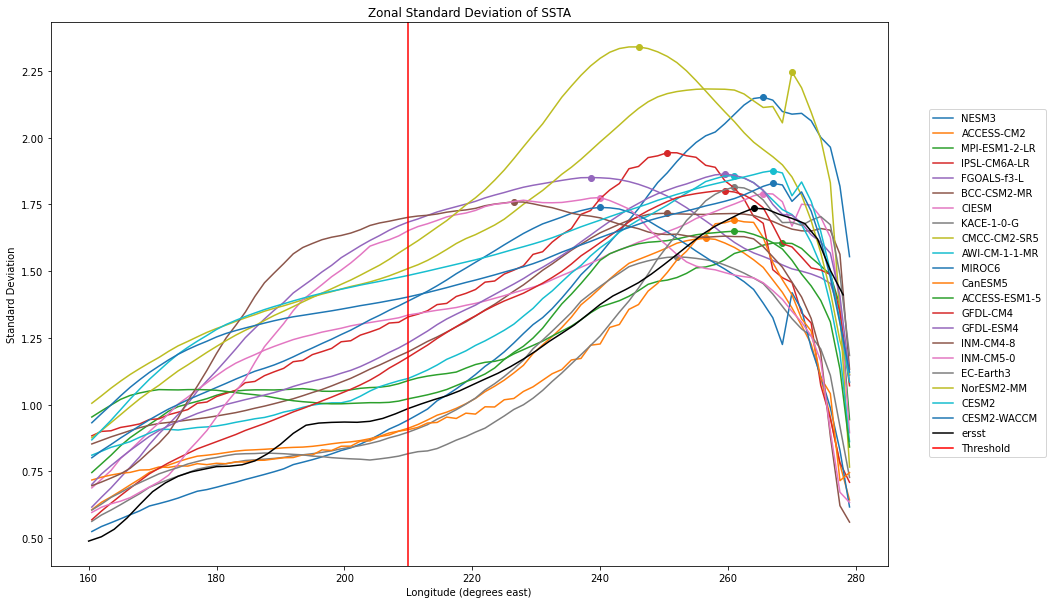

In [20]:
#Zonal Std Dev of SSTA

#ts = hist_temp.ts

fix, ax = plt.subplots(figsize = (15,10))

lon = np.arange(160.5, 279.5, 1.5)

for m in ts.model:
    zon_std = func.zonal_std(ts.sel(model=m))
    
    xmax = lon[np.argmax(zon_std)]
    ymax = zon_std.max()
    plt.plot(lon, zon_std, label=f'{m.data}')
    plt.scatter(xmax, ymax)
    
plt.plot(lon_obs, zon_std_obs, color='black', label='ersst')
ymax = np.nanmax(zon_std_obs)
xmax = lon_obs[np.where(zon_std_obs == ymax)]
plt.scatter(xmax, ymax, color='black')
    
#150W = 210E
plt.axvline(210, 0, 1, color='red', label='Threshold')
ax.set_title('Zonal Standard Deviation of SSTA')
ax.set(xlabel = 'Longitude (degrees east)', ylabel = 'Standard Deviation')

plt.legend(loc=(1.05, 0.2))

In [21]:
#Nino3.4 anomalies 
nino34_list = []

for m in ts.model:
    nino34_list.append(func.nino34(ts.sel(model=m)))
    
nino34 = xr.concat(nino34_list, dim='model')

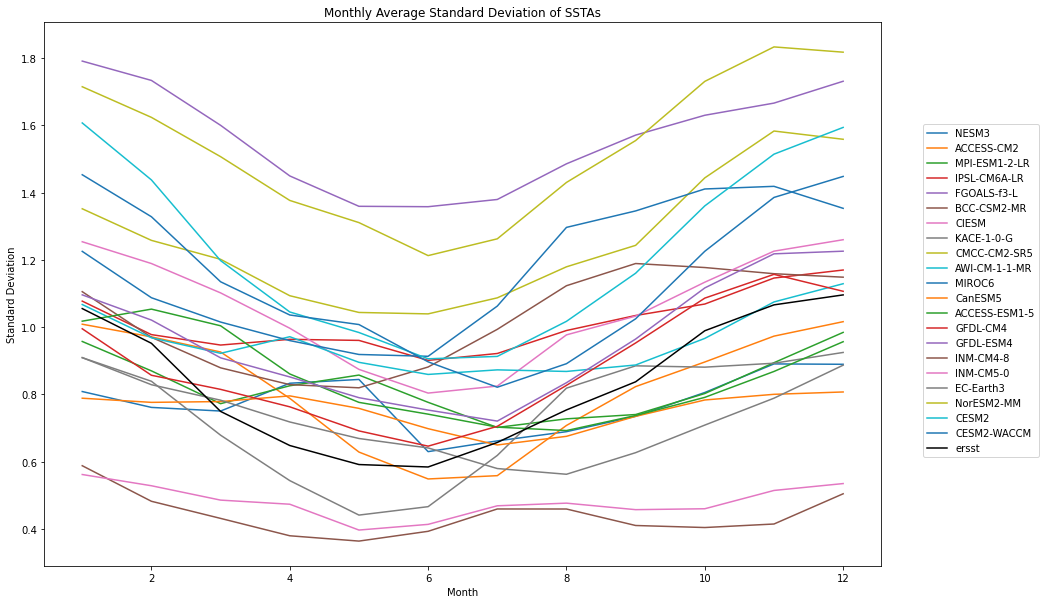

In [22]:
#Monthly average Nino3.4 SSTA Std
monthly_std = nino34.groupby('time.month').std(['time'])

fig, ax = plt.subplots(figsize = (15,10))

for m in monthly_std.model:
    monthly_std.sel(model=m).plot(ax=ax, label=f'{m.data}')
    
monthly_std_obs.plot(ax=ax, color='black', label='ersst')

ax.set_title('Monthly Average Standard Deviation of SSTAs')
ax.set(xlabel = 'Month', ylabel = 'Standard Deviation')

plt.legend(loc=(1.05, 0.2))

In [23]:
#SSTA composites for each model

nino_comp_list = []

for m in ts.model:
    nino_comp_list.append(func.nino_sst_comp(ts.sel(model=m), nino34.sel(model=m)))

nino_sst_comp = xr.concat(nino_comp_list, dim='model')

In [42]:
#ax = nino_sst_comp.plot(col='model', col_wrap=3)

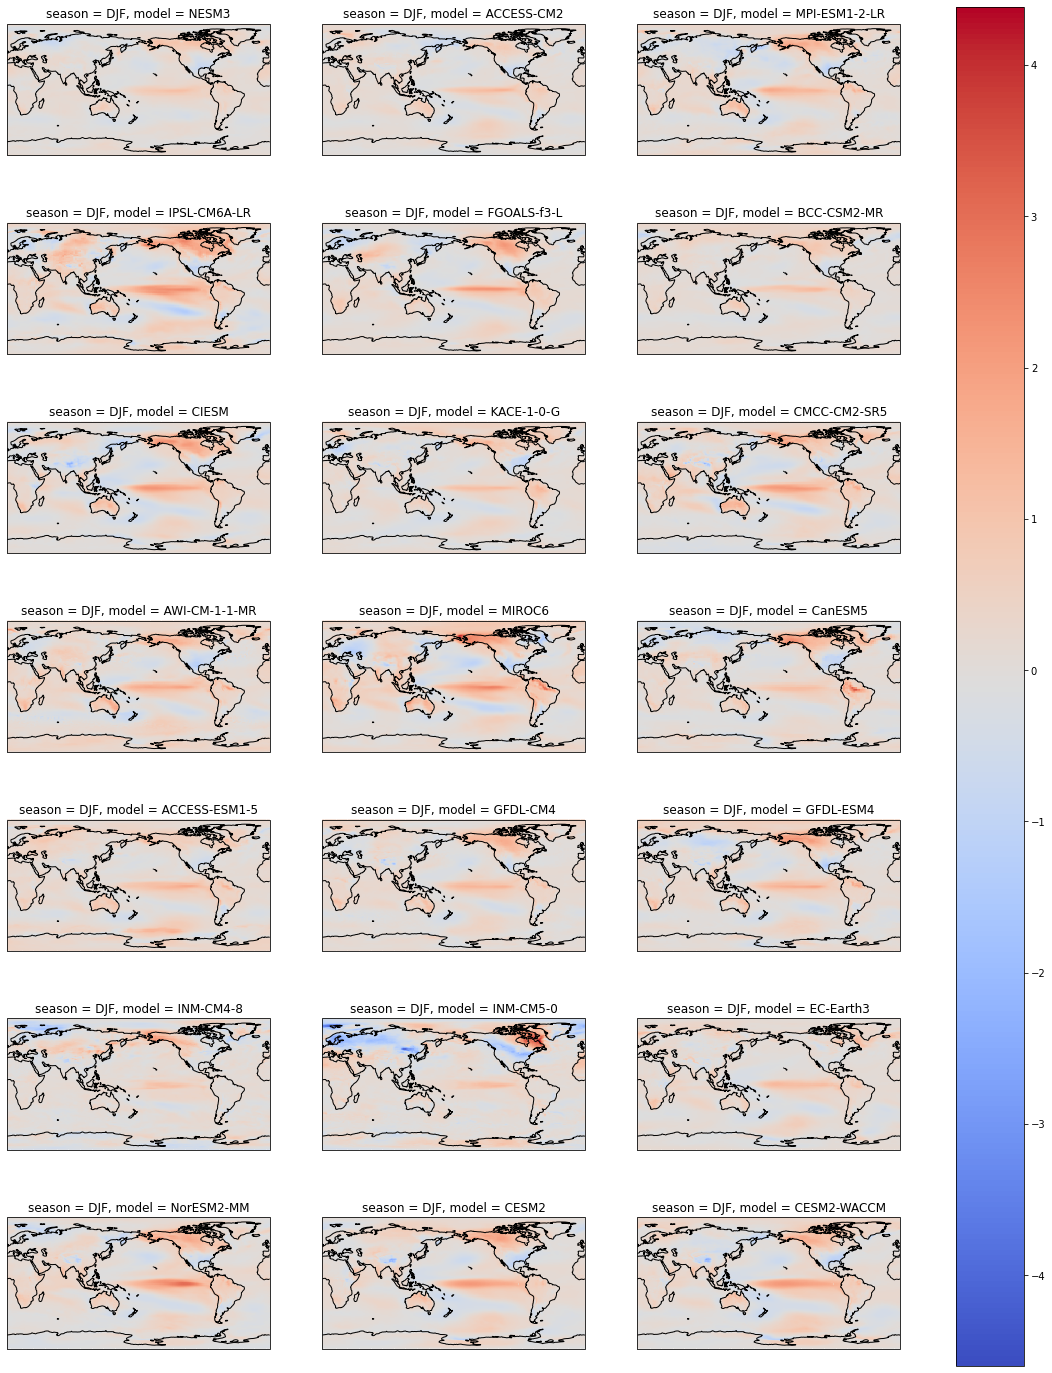

In [45]:
fig = plt.figure(figsize=(20,25))
axs = []

columns = 3
rows = 7

vmin = nino_sst_comp.min()
vmax = nino_sst_comp.max()

for i, m in enumerate(nino_sst_comp.model):
    # Add a subplot with a projection
    ax = fig.add_subplot(rows, columns, i+1, projection=ccrs.PlateCarree(180))
    
    # Select this model's data and plot it
    # We'll add a separate colour bar, but make sure all plots share the same min and max colour value
    d = nino_sst_comp.sel(model=m)
    C = d.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='coolwarm')
    ax.coastlines()
    
    # Gather all axes for when we make the colour bar
    axs.append(ax)
    
# Put the colour bar to the left of all axes
plt.colorbar(C, ax=axs)

In [25]:
nina_comp_list = []

for m in ts.model:
    nina_comp_list.append(func.nina_sst_comp(ts.sel(model=m), nino34.sel(model=m)))

nina_sst_comp = xr.concat(nina_comp_list, dim='model')

In [43]:
#ax = nina_sst_comp.plot(col='model', col_wrap=3)

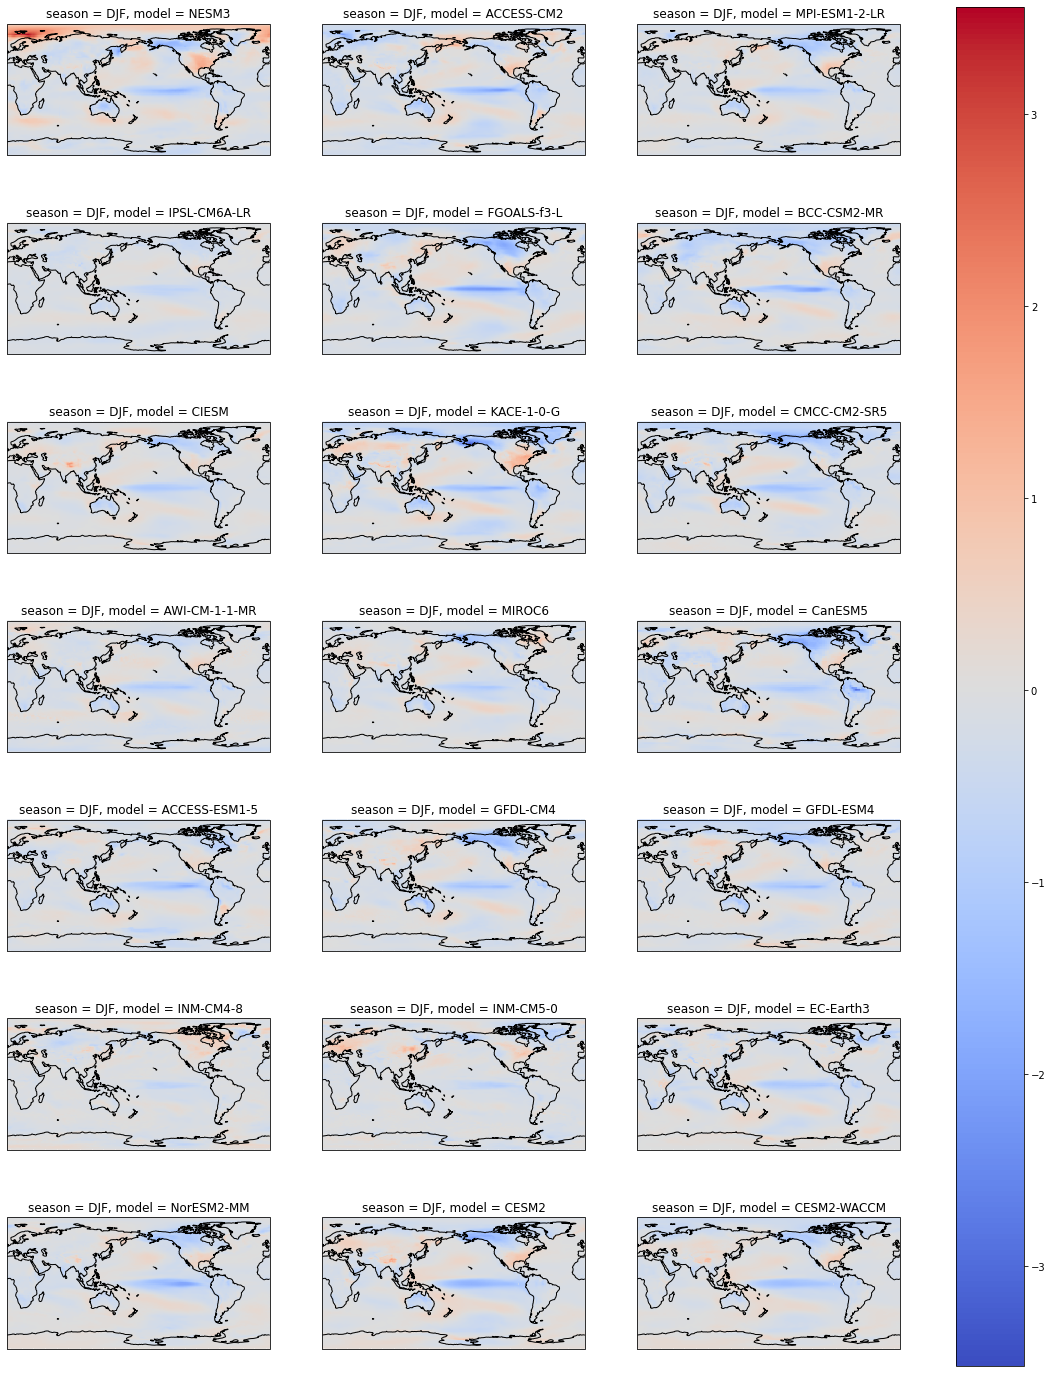

In [46]:
fig = plt.figure(figsize=(20,25))
axs = []

columns = 3
rows = 7

vmin = nina_sst_comp.min()
vmax = nina_sst_comp.max()

for i, m in enumerate(nina_sst_comp.model):
    # Add a subplot with a projection
    ax = fig.add_subplot(rows, columns, i+1, projection=ccrs.PlateCarree(180))
    
    # Select this model's data and plot it
    # We'll add a separate colour bar, but make sure all plots share the same min and max colour value
    d = nina_sst_comp.sel(model=m)
    C = d.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree(), cmap='coolwarm')
    ax.coastlines()
    
    # Gather all axes for when we make the colour bar
    axs.append(ax)
    
# Put the colour bar to the left of all axes
plt.colorbar(C, ax=axs)

## Evaluate Teleconnection
1. Spatial correlation between rainfall and Nino3.4 (for each model)
2. Typical El Nino rainfall pattern (for each model)

In [27]:
#Precip data for aus
pr = hist_precip.pr.sel(lon = slice(100, 160)).sel(lat=slice(-45, -10)).sel(time=slice('1854-01', '2014-12'))
pr = pr*86400

In [28]:
#Rainfall patterns (pattern correlation)
#nino_pr_comp_list = []

#for m in pr.model:
    #nino_pr_comp_list.append(func.nino_pr_comp(pr.sel(model=m), nino34.sel(model=m)))

#nino_pr_comp = xr.concat(nino_pr_comp_list, dim='model')

In [29]:
#ax = nino_pr_comp.plot(col='model', col_wrap=3)

In [30]:
#nina_pr_comp_list = []

#for m in pr.model:
    #nina_pr_comp_list.append(func.nina_pr_comp(pr.sel(model=m), nino34.sel(model=m)))

#nina_pr_comp = xr.concat(nina_pr_comp_list, dim='model')

In [31]:
#ax = nino_pr_comp.plot(col='model', col_wrap=3)

In [32]:
#Spatial correlation of nino3.4 and precip anomalies over Aus

pearson_list = []

for m in pr.model:
    pearson_list.append(func.spatial_corr(pr.sel(model=m), nino34.sel(model=m)))

pearson = xr.DataArray(pearson_list, dims=['model', 'lat', 'lon'])
pearson.coords['model'] = pr.model.values
pearson.coords['lat'] = pr.lat.values
pearson.coords['lon'] = pr.lon.values

In [47]:
#ax = pearson.plot(col='model', col_wrap=3)

In [48]:
pearson

<xarray.DataArray (model: 21, lat: 23, lon: 40)>
array([[[ 1.33663843e-01,  1.60088384e-01,  2.03956285e-01, ...,
          4.62824494e-03,  7.43057067e-04, -1.26017982e-02],
        [ 1.68117607e-01,  1.90764372e-01,  1.96638878e-01, ...,
         -3.53093792e-02, -3.64982075e-02, -3.63469513e-02],
        [ 2.16718015e-01,  2.10519331e-01,  1.98928538e-01, ...,
         -5.96588652e-02, -4.25720544e-02, -2.66392317e-02],
        ...,
        [-7.07305139e-02, -7.07900223e-02, -6.01350930e-02, ...,
         -3.73596100e-01, -4.35169933e-01, -4.73900738e-01],
        [-2.41428541e-02, -2.68669746e-02, -1.99438883e-02, ...,
         -3.32395068e-01, -4.05574561e-01, -4.61257580e-01],
        [-7.50990413e-03, -1.73065664e-02, -1.37690968e-02, ...,
         -2.69787051e-01, -3.19461076e-01, -3.45470742e-01]],

       [[ 2.57126314e-01,  2.58862296e-01,  2.62364561e-01, ...,
         -6.12475566e-02, -4.11284932e-02, -1.21449057e-02],
        [ 3.49444806e-01,  3.66171485e-01,  3.31416765e-01, ...,
         -8.68454371e-02, -5.33320398e-02, -1.62288118e-02],
        [ 3.71239765e-01,  3.29595057e-01,  2.99716391e-01, ...,
         -5.29304463e-02, -3.25592408e-02, -1.66945068e-02],
...
        [-4.43818869e-01, -4.32750735e-01, -4.26645831e-01, ...,
         -5.44522922e-01, -5.49249066e-01, -5.60310227e-01],
        [-4.71358000e-01, -4.53465026e-01, -4.46324703e-01, ...,
         -5.00065517e-01, -5.20103947e-01, -5.33204929e-01],
        [-4.59006233e-01, -4.72547340e-01, -4.82797317e-01, ...,
         -3.99856645e-01, -4.53117209e-01, -4.72660862e-01]],

       [[ 3.70483825e-01,  3.68085924e-01,  3.64336337e-01, ...,
         -1.09151295e-01, -1.30322970e-01, -1.64404086e-01],
        [ 3.44151228e-01,  3.37100883e-01,  3.43884984e-01, ...,
         -2.25487543e-01, -2.48658077e-01, -2.68705100e-01],
        [ 3.24906068e-01,  3.31228860e-01,  3.31376599e-01, ...,
         -3.12016526e-01, -3.16414245e-01, -3.26227104e-01],
        ...,
        [-3.63902402e-01, -3.78040935e-01, -3.71462114e-01, ...,
         -5.03090825e-01, -4.61679784e-01, -4.18510865e-01],
        [-3.46100824e-01, -3.66560574e-01, -3.79845496e-01, ...,
         -4.20054551e-01, -3.83660281e-01, -3.69362206e-01],
        [-3.35718615e-01, -3.62546011e-01, -3.98041571e-01, ...,
         -3.27702048e-01, -3.15133526e-01, -3.28561239e-01]]])
Coordinates:
  * model    (model) <U16 'NESM3' 'ACCESS-CM2' ... 'CESM2' 'CESM2-WACCM'
  * lat      (lat) float64 -44.25 -42.75 -41.25 -39.75 ... -14.25 -12.75 -11.25
  * lon      (lon) float64 100.5 102.0 103.5 105.0 ... 154.5 156.0 157.5 159.0

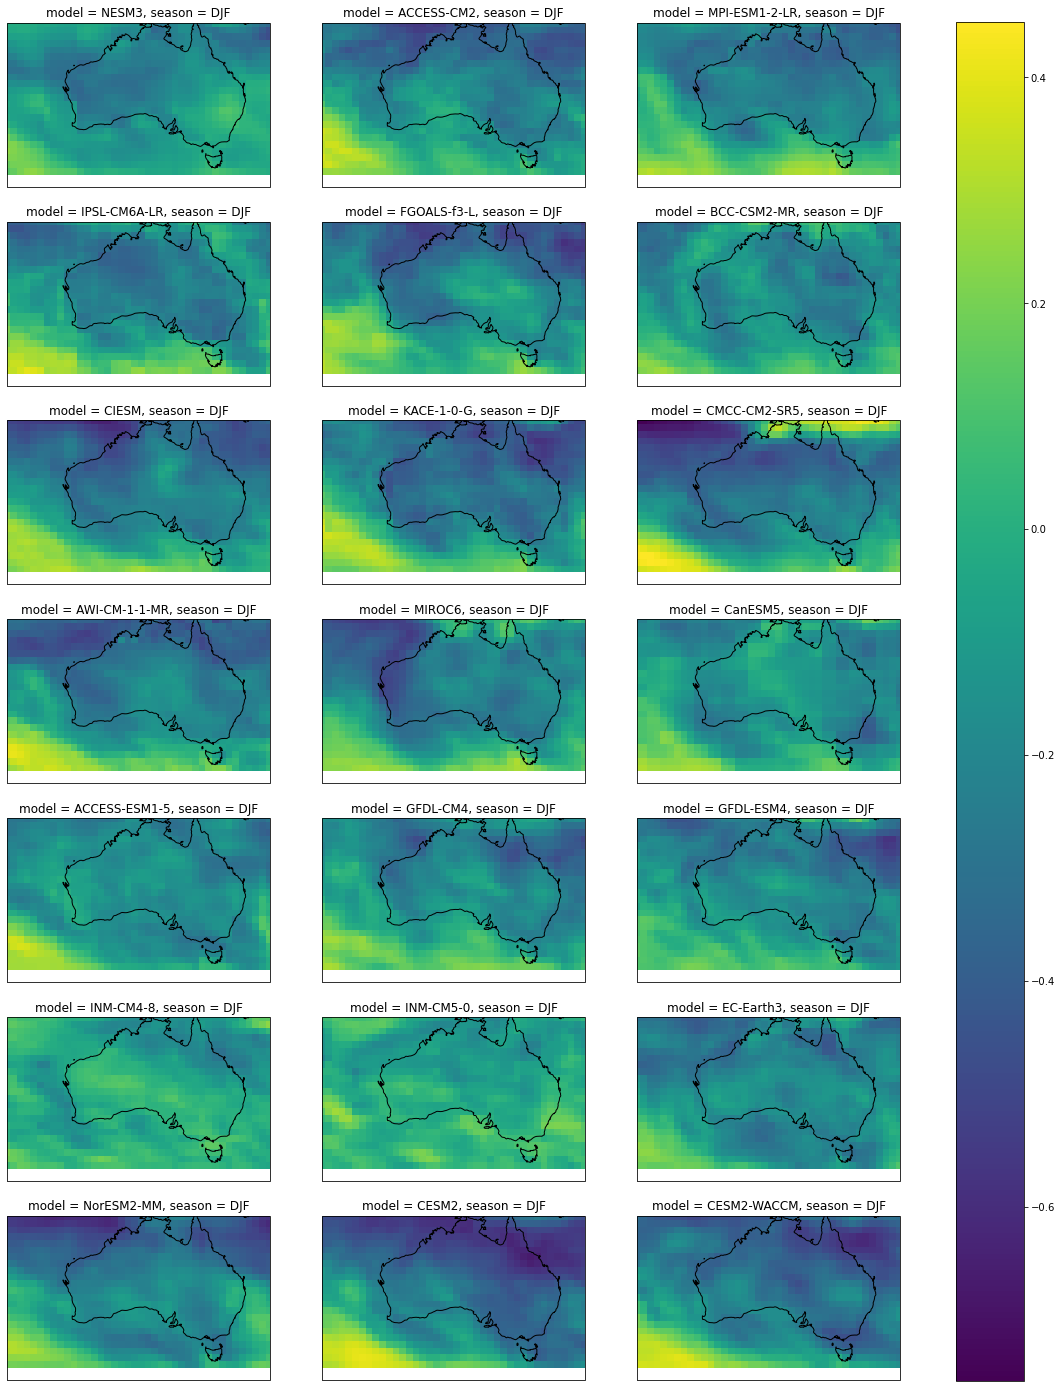

In [49]:
fig = plt.figure(figsize=(20,25))
axs = []

columns = 3
rows = 7

vmin = pearson.min()
vmax = pearson.max()

for i, m in enumerate(nina_sst_comp.model):
    # Add a subplot with a projection
    ax = fig.add_subplot(rows, columns, i+1, projection=ccrs.PlateCarree())
    ax.set_extent([100.5, 159, -44.25, -11.25])
    
    # Select this model's data and plot it
    # We'll add a separate colour bar, but make sure all plots share the same min and max colour value
    d = pearson.sel(model=m)
    C = d.plot(ax=ax, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())
    ax.coastlines()
    
    # Gather all axes for when we make the colour bar
    axs.append(ax)
    
# Put the colour bar to the left of all axes
plt.colorbar(C, ax=axs)